In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import musicalrobot
import cv2

In [2]:
from musicalrobot import edge_detection as ed
from musicalrobot import pixel_analysis as pa

In [3]:
from skimage import io
from skimage import feature
from scipy.ndimage.morphology import binary_fill_holes
from skimage.measure import label
from skimage.measure import regionprops
from skimage.exposure import equalize_adapthist
from skimage.morphology import remove_small_objects
from scipy.interpolate import BSpline
from scipy.signal import find_peaks

### Function to detect inflection point

In [4]:
def inflection_point(s_temp,p_temp):
    s_infl = []
    p_infl = []
    s_peaks = []
    p_peaks = []
    inf_peak = [] ; inf_temp = []
    for temp in s_temp:
        frames = np.linspace(1,len(temp),len(temp))
        # Fitting a spline to the temperature profile of the samples.
        bspl = BSpline(frames,temp,k=3)
        # Stacking x and y to calculate gradient.
        gradient_array = np.column_stack((frames,bspl(frames)))
        # Calculating gradient.
        gradient = np.gradient(gradient_array,axis=0)
        # Calculating derivative
        derivative = gradient[:,1]/gradient[:,0]
        # Finding peaks in the derivative plot.
        peaks, properties = find_peaks(derivative,height=0.1)
        max_height1 = np.max(properties['peak_heights'])
        # To find the second highest peak
        a = list(properties['peak_heights'])
        a.remove(max_height1)
        max_height2 = np.max(a)
        # Appending the index of the two highest peaks to lists.
        inf_index1 = list(properties['peak_heights']).index(max_height1)
        inf_index2 = list(properties['peak_heights']).index(max_height2)
        # Appending the frame number in which these peaks occur to a list
        s_peaks.append([peaks[inf_index1],peaks[inf_index2]])
        # Appending the temperature at the peaks.
        s_infl.append([temp[peaks[inf_index1]],temp[peaks[inf_index2]]])
    for temp in p_temp:
        frames = np.linspace(1,len(temp),len(temp))
        bspl = BSpline(frames,temp,k=3)
        gradient_array = np.column_stack((frames,bspl(frames)))
        gradient = np.gradient(gradient_array,axis=0)
        derivative = gradient[:,1]/gradient[:,0]
        peaks, properties = find_peaks(derivative,height=0.1)
        max_height1 = np.max(properties['peak_heights'])
        # To find the second highest peak
        a = list(properties['peak_heights'])
        a.remove(max_height1)
        max_height2 = np.max(a)
        inf_index1 = list(properties['peak_heights']).index(max_height1)
        inf_index2 = list(properties['peak_heights']).index(max_height2)
        p_peaks.append([peaks[inf_index1],peaks[inf_index2]])
        p_infl.append([temp[peaks[inf_index1]],temp[peaks[inf_index2]]])
    for i,peaks in enumerate(s_peaks):
        for peak in peaks:
            if abs(peak - p_peaks[i][0]) >= 3:
                inf_peak.append(peak)
                print(peak)
                break
            else:
                pass
    for i,temp in enumerate(s_temp):
        inf_temp.append(temp[inf_peak[i]])
    return inf_temp, s_peaks, p_peaks

In [5]:
frames = ed.input_file('../musicalrobot/data/8_15_19_PPA.tiff')

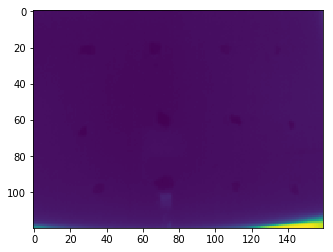

In [6]:
plt.imshow(frames[0])

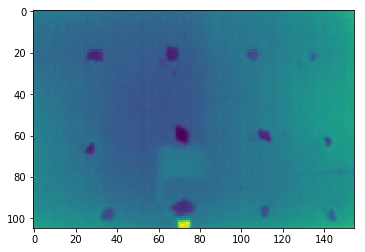

In [7]:
crop_frame = []
for frame in frames:
    crop_frame.append(frame[0:105,0:155])
plt.imshow(crop_frame[0])

In [8]:
len(frames)

1375

In [9]:
len(crop_frame)

1375

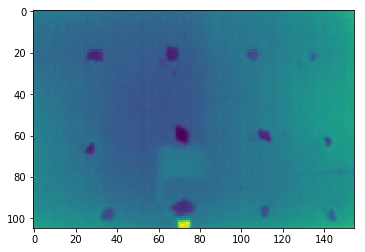

In [10]:
plt.imshow(crop_frame[0])
# plt.colorbar()

In [11]:
np.max(crop_frame[0])

30424

In [24]:
edges = feature.canny(crop_frame[0]/1400)
filled_samples = binary_fill_holes(edges)
cl_samples = remove_small_objects(filled_samples,min_size = 15)
labeled_samples = label(cl_samples)

In [25]:
crop_frame[0].shape[1]

155

In [26]:
min_size = crop_frame[0].shape[1]

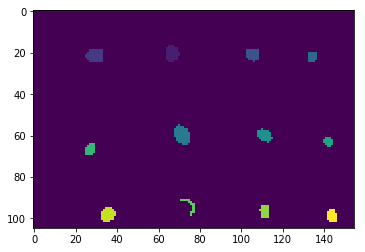

In [27]:
plt.imshow(labeled_samples)

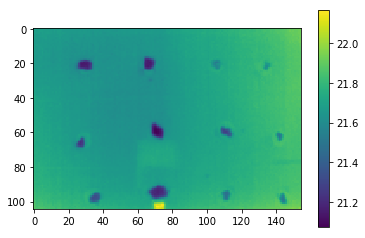

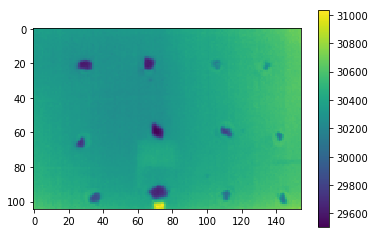

In [28]:
plt.imshow(crop_frame[70]/1400)
plt.colorbar()
plt.show()
plt.imshow(crop_frame[70])
plt.colorbar()

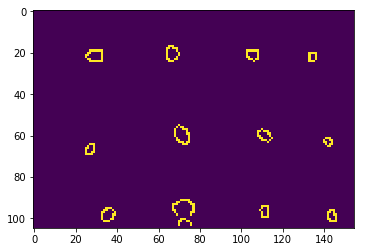

In [29]:
plt.imshow(edges)

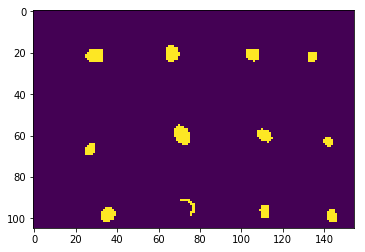

In [30]:
plt.imshow(cl_samples)

In [31]:
regprops = ed.regprop(labeled_samples,crop_frame,12)

In [32]:
regprops[0]

,Row,Column,Plate,Plate_coord,Area,Perim,Mean Intensity
7,66.0,27.0,29675.0,37.0,26.0,16.242641,29423.0
1,21.0,29.0,29656.0,39.0,48.0,23.656854,29434.0
10,98.0,35.0,29785.0,45.0,37.0,19.899495,29598.0
0,20.0,66.0,29643.0,76.0,44.0,22.485281,29423.0
4,59.0,71.0,29658.0,81.0,58.0,26.727922,29334.0
8,93.0,75.0,29736.0,85.0,15.0,14.207107,29509.0
2,21.0,105.0,29785.0,115.0,30.0,18.242641,29570.0
5,59.0,111.0,29741.0,121.0,34.0,20.727922,29469.0
9,96.0,111.0,29837.0,121.0,25.0,16.828427,29603.0
3,21.0,134.0,29877.0,144.0,19.0,13.414214,29703.0


In [33]:
s_temp, plate_temp = ed.sample_temp(regprops,crop_frame)

In [34]:
len(plate_temp)

12

Text(0, 0.5, 'Temperature of the PPA sample($^\\circ$C)')

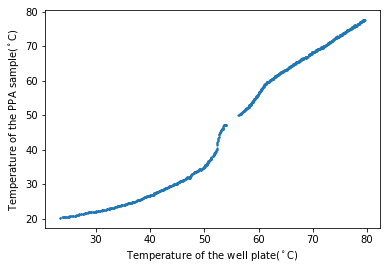

In [35]:
plt.scatter(plate_temp[4],s_temp[4],s=1.5)
plt.xlabel('Temperature of the well plate($^\circ$C)')
plt.ylabel('Temperature of the PPA sample($^\circ$C)')

In [36]:
x = np.linspace(1,len(s_temp[0]),len(s_temp[0]))

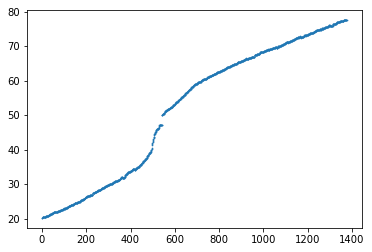

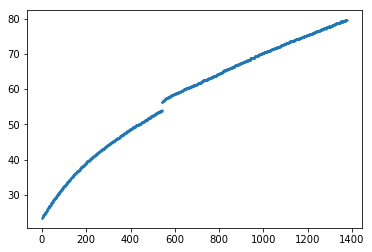

In [37]:
plt.scatter(x,s_temp[4],s=0.5)
plt.show()
plt.scatter(x,plate_temp[4],s=1.5)

In [38]:
i_temp,s_peaks,p_peaks = inflection_point(s_temp,plate_temp)

374
348
335
426
498
346
385
453
401
336
576
380


In [39]:
i_temp

[33.78,
 33.11,
 45.04,
 49.91,
 41.88,
 42.5,
 45.69,
 45.2,
 40.19,
 44.29,
 55.35,
 46.11]

In [40]:
s_peaks

[[543, 374],
 [543, 348],
 [543, 335],
 [542, 426],
 [543, 498],
 [543, 346],
 [542, 385],
 [543, 453],
 [542, 401],
 [543, 336],
 [543, 576],
 [542, 380]]

In [41]:
p_peaks

[[542, 24],
 [542, 49],
 [543, 30],
 [543, 125],
 [543, 4],
 [543, 473],
 [543, 196],
 [543, 46],
 [543, 4],
 [543, 37],
 [543, 12],
 [543, 9]]